The Monty Hall Problem
=====

####Introduction
Thinking _conditionally_ is a fundamental ingredient in Bayesian statistics. When applied correctly it can give rise to surprising outcomes and might result in competitetive advantages. This is the case in the classic Monty Hall problem.

Monty Hall?
------

Monty Hall was a game show host in the 70's(?) and gave his participants the following choice

> There are 3 doors. Behind one door is a car, behind the two others are goats. The participant is allowed to choose a door. Monty Hall then open one of the doors that has not been chosen, thus revealing a goat (he obviously won't open the car door). The participant is then given the opportunity to switch doors.

Without deep conditional thinking one might suspect that the opportunity of a second choice does not matter. However, is that true, or might we gain a competitetive advantage by observing the door Monty opens?

Before we give a more mathematical answer, let's investigate the problem numerically.

Let's play the game over and over and over again
------

To get a statistical sense of the success distribution we simulate the game repeatedly and collect the results.

####Python imports

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from numpy.random import choice

%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rc_params_from_file("../styles/matplotlibrc" ).update()

Let's first define some helper function for chosing the doors behind which the car lives and which the contestant chooses

In [19]:
def carBehindDoor(prob = [1./3, 1./3, 1./3]):
    list_of_doors = ["A", "B", "C"]
    return str(choice(list_of_doors, p = prob))

def contestantChoosesRandomDoor(prob = [1./3, 1./3, 1./3]):
    list_of_doors = ["A", "B", "C"]
    return str(choice(list_of_doors, p = prob))

As a result of these choices, Monty opens another door

In [20]:
def montyOpensDoor(contestantChoice, carBehindDoor, pref_monty = [0.5, 0.5]):
    list_of_doors = ["A", "B", "C"]
    
    # Monty will not open the car door, so we remove it
    list_of_doors.remove(carBehindDoor)
    
    # If the contestant chooses the door which contains the car,
    # Monty can choose which door to open
    if contestantChoice is carBehindDoor:
        return str(choice(list_of_doors, p = pref_monty))
    
    # If the car and contestant door do not coincide,
    # Monty has only a single choice
    elif contestantChoice is list_of_doors[0]:
        return list_of_doors[1]
    else:
        return list_of_doors[0]

Now we have all the moves of the game ready. We only need to count how often the contestant wins if he switches.

In [21]:
def successUponSwitch(car_door, contestant_door, monty_door):
    list_of_doors = ["A", "B", "C"]
    
    # Remove Monty's door
    list_of_doors.remove(monty_door)
    
    # The contestant switches, so we remove his door
    list_of_doors.remove(contestant_door)
    
    # check if final door is the door with the car
    if list_of_doors[0] == car_door:
        return True
    elif list_of_doors[0] != car_door:
        return False

Let's string together the experiment

In [22]:
def runExperiment(n_trials):
    success = 0
    for k in range(n_trials):
        car_behind_door = carBehindDoor()
        contestant_door = contestantChoosesRandomDoor()
        monty_door = montyOpensDoor(contestant_door, car_behind_door)
        if successUponSwitch(car_behind_door, contestant_door, monty_door):
            success += 1
    return float(success)/float(n_trials)

To get a reasonable estimate we run the experiment $10000$ times and obtain the success probability as

In [23]:
print "We succeed with a probability: %0.3f" % runExperiment(10000)

We succeed with a probability: 0.669


We win in about $2/3$ of the cases and hence have a distinct advantage over Monty by observing which door he opens. On average switching is good and get's us a car.

Mathematical reasoning
------

To understand the outcome we use conditional probabilities. To simplify notations we denote the doors now by numbers $1, 2, 3$ and denote the event of finding the car behind door $j$ as $C_j$, Monty opening door $j$ as $M_j$ and the participant choosing door $j$ as $X_j$. Finally we call the event of success after switching doors $S$. We look for $P(S)$.

To gain some intuition let's look at a decision tree

<img src="http://upload.wikimedia.org/wikipedia/commons/9/9e/Monty_tree.svg"> Source: [Wikimedia Commons](http://upload.wikimedia.org/wikipedia/commons/9/9e/Monty_tree.svg)

It now becomes very obvious that switching the doors after observing Monty's door yields a better outcome for us! To reason through the problem we observe that the problem is completely symmetrical with respect to permutations of the doors. So we assume that the car is behind door $3$. Making use of the [law of total probability](http://en.wikipedia.org/wiki/Law_of_total_probability) and _conditioning on opening a specific door_ we can easily write
\begin{align}
P(S) = P(S|X_1) P(X_1) + P(S|X_2) P(X_2) + P(S|X_3) P(X_3) = 1 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} + 0 = \frac{2}{3}
\end{align}
which is the result we found numerically. This is easily verified by noting that if we choose door $3$ we will never find the car, whereas in the other two cases switching will always win.

Note that this is completely independent of Monty's choice. No matter what he does in 2 out of 3 cases we win the car! Of course in reality we will not make the choice independent of Monty ... he will try to keep us away from switching, by making us doubt.

###Dependence on Monty's preference for a door


We saw that observing Monty opening a door does not give us any additional information about where the car might be if we ask for the _total_ probability of success. This sounds surprising! Maybe we might gain even more advantage if we knew something about Monty's preferences for opening a door? Let's run some experiments. Assume Monty is always standing next to door $A$ and opens the closest goat-door with probability $p$. 

Stringing the experiment together we get:

In [24]:
def runExperiment(n_trials, p_monty):
    success = 0
    for k in range(n_trials):
        car_behind_door = carBehindDoor()
        contestant_door = contestantChoosesRandomDoor()
        monty_door = montyOpensDoor(contestant_door, car_behind_door, pref_monty=[p_monty, 1-p_monty])
        if successUponSwitch(car_behind_door, contestant_door, monty_door):
            success += 1
    return float(success)/float(n_trials)

In [25]:
p_monty = 0.9
print "We succeed with a probability: %0.3f" % runExperiment(10000, p_monty)

We succeed with a probability: 0.660


Indeed! Monty's preferences do not play a role in the grand scheme of things. But are we asking the right question here?

Lazy Monty and conditional probability
------

What we should really be asking is the question of how often we succeed _given that Monty opens a specific door_, i.e.
\begin{align}
P(S | M_2) = P(C_3 | M_2)
\end{align}

Using the definition of conditional probability this can be re-expressed as
\begin{align}
P(C_3 | M_2) = \frac{P(C_3\cap M_2)}{P(M_2)} = \frac{P(S\cap M_2)}{P(M_2)}
\end{align}

Let's simulate this!

What we need is the count of cases where we won _and_ Monty opened a specific door

In [26]:
def runConditionalExperiment(n_trials, observed_monty_door, p_monty):
    cond_success = 0
    count_monty_observerd_door = 0
    for k in range(n_trials):
        car_behind_door = 'C'
        contestant_door = contestantChoosesRandomDoor()
        monty_door = montyOpensDoor(contestant_door, car_behind_door, pref_monty=[p_monty, 1-p_monty])
        
        if monty_door == observed_monty_door:
            count_monty_observerd_door += 1
        
        if successUponSwitch(car_behind_door, contestant_door, monty_door) and monty_door == observed_monty_door:
            cond_success += 1
    return float(cond_success)/float(count_monty_observerd_door)

Note that in the return argument we returned the ratio between the counts and not the probabilities. This is correct since we get the probabilities by normalizing with the number of trials. However, this normalization drops out when calculating the ratio.

What do we get?

In [27]:
p_monty = .75
print "We succeed with a probability: %0.3f" % runConditionalExperiment(10000, 'B', p_monty)

We succeed with a probability: 0.802


Surprise! We do get some additional advantage if we ask the question what our success rate is _given Monty opens a specific door_. How does this probability depend on his preferences?

In [28]:
p_monty = np.linspace(0, 1, 100)
cond_probabilities = []
for prob in p_monty:
    cond_probabilities.append(runConditionalExperiment(10000, 'B', prob))

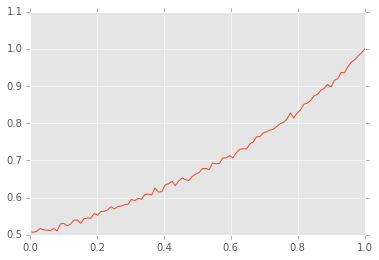

In [29]:
plt.plot(p_monty, cond_probabilities)

This is quite surprising! If Monty never opens door $2$ we have no advantage and win the car only half of the time. However, if Monty opens door $2$ always, we are guaranteed to win the car every single time!

To understand this in more formal terms we make use of [Bayes rule](http://en.wikipedia.org/wiki/Bayes%27_theorem) and find
\begin{align}
P(C_3 | M_2) \,=\, \frac{P(M_2 | C_3) P(C_3)}{P(M_2)}
\end{align}

Let's look at the different probabilities individually:

- $P(M_2 | C_3)=1$, since Monty is forced to open door $2$ in this constellation (the contestant has to choose door $1$ or the strategy fails)
- $P(C_j) = 1/3$, since the contestant has no prior knowledge of where the car is
- $P(M_2)$ is slightly more complicated. To simplify this we expand this into disjoint cases using the [law of total probability](http://en.wikipedia.org/wiki/Law_of_total_probability). We then have (given the contestant chooses door $1$):
\begin{align}
P(M_2) = P(M_2|C_1) P(C_1) + P(M_2|C_2) P(C_2) + P(M_2|C_3) P(C_3)
 = (1-p) \cdot \frac{1}{3} + 0 + 1\cdot \frac{1}{3}
\end{align}

Putting this all together we find
\begin{align}
P(C_3 | M_2) \,=\, \frac{1}{2-p}
\end{align}
which is exactly what we found in the graph above! Note that in the symmetric case $p=0.5$ we obtain the result of total probability, meaning that at this point the events are independent.

Summary
------

The Monty Hall problem has several surprising and non-intuitive twists. First of all, we can come up with a dominant stragegy that always beats Monty, by simply switching the doors independent of Monty's choice. This is surprising as naively one would think the chances are equal. Second, when conditioning on Monty's behavior, we do see a dependence of our success strategy on Monty's preference of doors. If we stick with our original choice always, then Monty can come up with a strategy that will equalize our chances.

Enjoy this notebook and have a lot of fun playing some more with it, such as exploring different amount of doors or a different strategy. Contributions are more than welcome!

###Miscellenea

####References
are given throughout the text

####Stylesheet

In [30]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()